In [51]:
#comence importando las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [52]:
#importé el primer dataset que voy a utilizar, y le hice varias modificaciones
df = pd.read_csv('Internet_Accesos-por-velocidad.csv')
columnasdf= ['Año', 'Provincia', '+ 30 Mbps', 'Total']
df = df.replace(1, None)
df = df.replace(2, None)
df = df.replace(4, None)
df = df.replace(2014, None)
df = df.replace(2015, None)
df = df.replace(2016, None)
df = df.replace(2017, None)
df = df.replace(2018, None)
df = df.replace(2019, None)
df = df.replace(2020, None)
df = df.replace('Buenos Aires', 'Bs As')
df = df.replace('Santiago Del Estero', 'Sgo del Est')
df = df.replace('Capital Federal', 'Cap Fed')
df = df.replace('Tierra Del Fuego', 'Tierra Fgo')
df = df.dropna()
df_limpio = df[columnasdf]
df_limpio['Total'] = df_limpio['Total'].str.replace('.', '').astype(int)
df_limpio['+ 30 Mbps'] = df_limpio['+ 30 Mbps'].str.replace('.', '').astype(int)
df_limpio['Porcentaje'] = round(df_limpio['+ 30 Mbps'] *100 / df_limpio['Total'],2)
df_limpio = df_limpio.reset_index(drop=True)
#lo exportamos ya limpio para utilizarlo en el dashboard
df_limpio.to_csv('Datos limpios 1.csv')
df_limpio.head(3)

,Año,Provincia,+ 30 Mbps,Total,Porcentaje
0,2022,Bs As,3618689,4721668,76.64
1,2022,Cap Fed,1253105,1547679,80.97
2,2022,Catamarca,50298,70293,71.55


En el Gráfico N°1 lo que veremos son los porcentajes de hogares con más de 30 mbps, divididos en provincias durante el año 2021 y 2022. Notaremos la desigualdad que se encuentra en algunas provincias, ya que mientras que en Capital Federal el 80% de los hogares cumple con el requisito, en San Luis y Tierra del fuego nos encontramos con menos de un 2%, y en provincias como Chubut, Santa Cruz y Santiago del Estero apenas un 10% de hogares aproximadamente cuentan con esa velocidad.
Además, siguiendo el gráfico durante el año 2021, veremos que mientras que en Capital Federal el 76% de las viviendas ya cuentan con más de 30 mbps, 5 provincias cuentan recién con un 1% o menos de hogares que cumplan el requisito.

Gráfico N°1

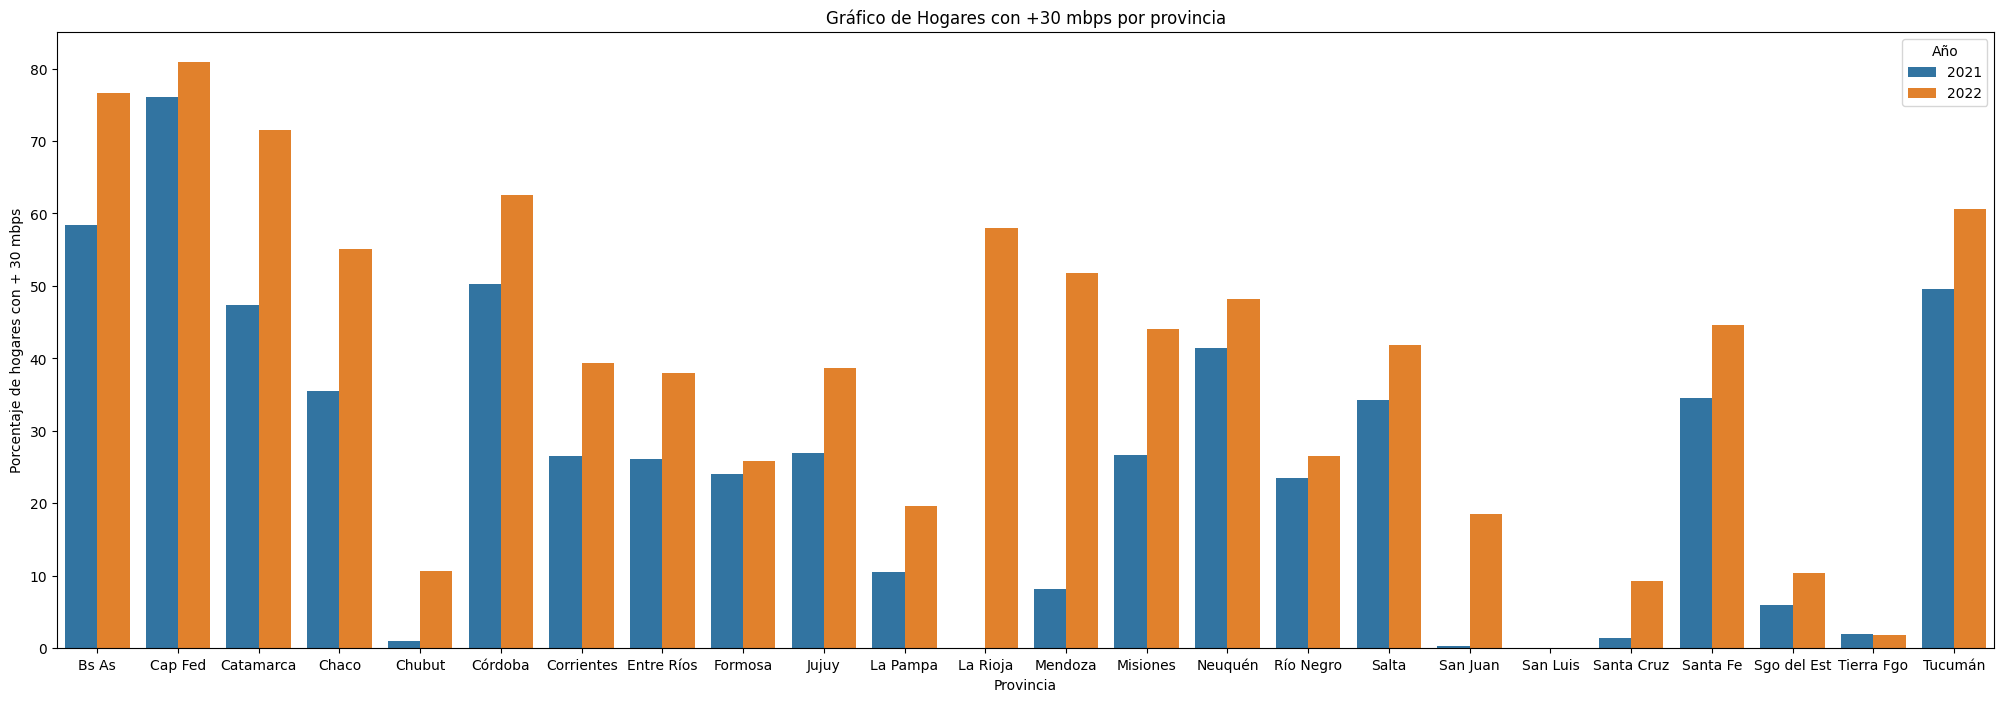

In [53]:
plt.figure(figsize=(25, 8))
sns.barplot(data=df_limpio, x='Provincia', y='Porcentaje', hue='Año')
plt.xlabel('Provincia')
plt.ylabel('Porcentaje de hogares con + 30 mbps')
plt.title('Gráfico de Hogares con +30 mbps por provincia')
plt.show()

Primer KPI:
El objetivo de mi primer KPI es el de alcanzar en todas las provincias el 40% de viviendas con más de 30 mbps, el plazo en el que se debe llevar a cabo es durante el año 2023 y 2024. Si bien un 40% no es un porcentaje tan alto, es una forma de lograr una mayor equidad entre provincias.

In [54]:
#gráfico interactivo innecesario, solo quería probar algo
px.scatter(x='Provincia', y= 'Total', data_frame=df_limpio)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Provincia=%{x}<br>Total=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['Bs As', 'Cap Fed', 'Catamarca', 'Chaco', 'Chubut', 'Córdoba',
                          'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja',
                          'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan',
                          'San Luis', 'Santa Cruz', 'Santa Fe', 'Sgo del Est', 'Tierra Fgo',
                          'Tucumán', 'Bs As', 'Cap Fed', 'Catamarca', 'Chaco', 'Chubut',
                          'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa',
                          'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan',
                          'San Luis', 'Santa Cruz', 'Santa Fe', 'Sgo del Est', 'Tierra Fgo',
                          'Tucumán'], dtype=object),
              'xaxis': 'x',
              'y': array([4721668, 1547679,   70293,  144146,  165778, 1038668,  144846,  268959,
                            68538,  118823,  116092,   86864,  289523,  182157,  163161,  160558,
                           204541,  103399,  122070,   49510,  887810,  119032,   53896,  263117,
                          4251609, 1413405,   56254,  139871,  156066,  946788,  133819,  260375,
                            52795,  111158,  100487,  255939,  158528,  139809,  144585,  195833,
                            79483,  117864,   48976,  841584,  115458,   50223,  232472]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Provincia'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Total'}}}
})

Segundo KPI:
El objetivo de mi segundo KPI es el de aumentar el porcentaje de viviendas con fibra óptica, ya que mirando el Gráfico N°2, nos damos cuenta que solo el 33.5% de los hogares cuentan con ella. Este cambio es muy importante, ya que además de buscar mejorar la calidad de conexión de las personas también nos ayuda con el objetivo de mis otros dos KPIs, en el caso del primero, la llegada de la fibra óptica un mayor número de hogares nos facilitaría también el alcanzar una velocidad de más de 30 mbps; y en el caso del tercer KPI lo veremos más adelante.
La cantidad de viviendas que busco que lleguen a tener fibra óptica es el 40%, y el plazo en el cual se debe alcanzar es durante el año 2023 y 2024.

In [55]:
#importé el segundo dataset que voy a utilizar, y le hice un par de modificaciones
df2 = pd.read_csv('Listadodelocalidadesconconectividadainternet_2750221689189884441.csv')
df2['FIBRAOPTICA'].value_counts()

FIBRAOPTICA
--    2866
SI    1446
Name: count, dtype: int64

In [56]:
columnasdf2 = ['Provincia', 'Localidad', 'FIBRAOPTICA']
df2_limpio = df2[columnasdf2]
df2_limpio = df2_limpio.replace('--', 'NO')
#lo exportamos ya limpio para utilizarlo en el dashboard
df2_limpio.to_csv('Datos limpios 2.csv')
df2_limpio.head(3)

,Provincia,Localidad,FIBRAOPTICA
0,BUENOS AIRES,Villa Bordeau,NO
1,BUENOS AIRES,Villa Espora,NO
2,BUENOS AIRES,Balcarce,SI


Gráfico N°2

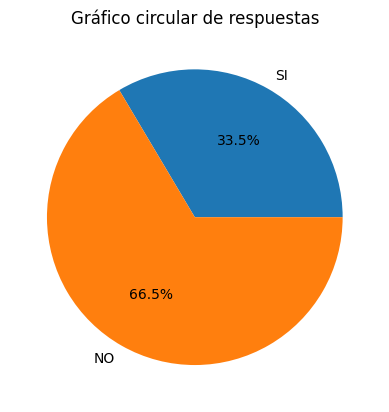

In [57]:
porcentaje_si = (df2_limpio['FIBRAOPTICA'] == 'SI').mean() * 100
porcentaje_no = (df2_limpio['FIBRAOPTICA'] == 'NO').mean() * 100
plt.pie([porcentaje_si, porcentaje_no], labels=['SI', 'NO'], autopct='%1.1f%%')
plt.title('Gráfico circular de respuestas')
plt.show()

Tercer KPI:
El objetivo de mi tercer KPI es el de aumentar los ingresos que obtiene Enacom con la "venta" de internet, ya que si bien el Gráfico N°3 nos muestra que año a año los ingresos aumentan muy positivamente, este gráfico no es del todo sincero. Teniendo en cuenta la inflación en Argentina, esos ingresos hay que compararlos con el precio del dólar oficial de cada año y veremos como en realidad los ingresos no fueron aumentando año a año como muestra el Gráfico N°3. Si vemos el Gráfico N°4, notaremos como los ingresos de la empresa llevan estancados los últimos años en aproximadamente 500000 dólares, y teniendo en cuenta que todos los años tienen que invertir en mejorar su servicio, a la empresa no le estaría yendo tan bien.
Basándome es lo anterior, la meta de mi KPI es la de aumentar el ingreso en dólares para el 2024, llegando por segunda vez a la cifra de 650000 dólares, y para ello son importantes mis dos primeros KPIs, ya que haciendo llegar la fibra óptica a más hogares y logrando que un 40% de ellos tenga más de 30 mbps de velocidad, los ingresos se verían aumentados automáticamente.
A tener en cuenta, ambos gráficos están basados en el primer cuatrimestre de cada año, y no en los ingresos del año entero.

In [58]:
#importé el tercer dataset que voy a utilizar, y le hice varias modificaciones
df3 = pd.read_csv('Internet_Ingresos.csv')
df3.head(3)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022


In [59]:
df3 = df3.replace(2, None)
df3 = df3.replace(3, None)
df3 = df3.replace(4, None)
df3 = df3.dropna()
df3['Ingresos (miles de pesos)'] = df3['Ingresos (miles de pesos)'].str.replace('.', '').astype(int)
df3

,Año,Trimestre,Ingresos (miles de pesos),Periodo
2,2022,1,55589997,Ene-Mar 2022
6,2021,1,36676371,Ene-Mar 2021
10,2020,1,29946216,Ene-Mar 2020
14,2019,1,20207414,Ene-Mar 2019
18,2018,1,13171459,Ene-Mar 2018
22,2017,1,8701201,Ene-Mar 2017
26,2016,1,5936845,Ene-Mar 2016
30,2015,1,4876385,Ene-Mar 2015
34,2014,1,2984054,Ene-Mar 2014


Gráfico N°3

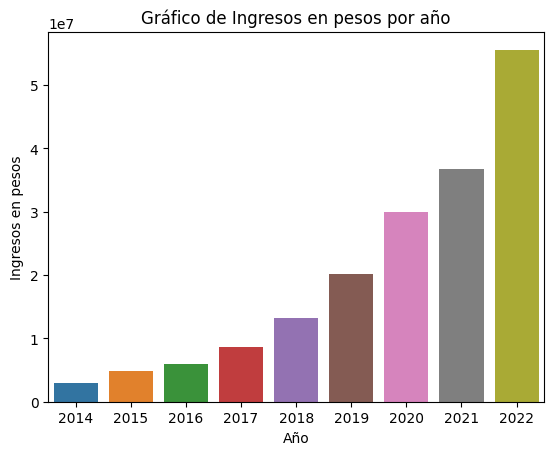

In [60]:
sns.barplot(data=df3, x='Año', y='Ingresos (miles de pesos)')
plt.xlabel('Año')
plt.ylabel('Ingresos en pesos')
plt.title('Gráfico de Ingresos en pesos por año')
plt.show()

In [61]:
#creé una lista con el precio del dólar de enero de cada año, y lo utilicé para una nueva columna
dolar_año = [104.25, 86.25, 58.00, 36.40, 19.40, 15.70, 13.58, 8.55, 7.87]
df3 = df3.reset_index(drop=True)
df3['Valor dolar oficial frente al peso'] = 0
for i in range(0, len(dolar_año)):
    df3['Valor dolar oficial frente al peso'][i] = dolar_año[i]
df3['Ingresos(en dolares)'] = round(df3['Ingresos (miles de pesos)']/df3['Valor dolar oficial frente al peso'], 2)
#lo exportamos ya limpio para utilizarlo en el dashboard
df3.to_csv('Datos limpios 3.csv')
df3

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Valor dolar oficial frente al peso,Ingresos(en dolares)
0,2022,1,55589997,Ene-Mar 2022,104.25,533237.38
1,2021,1,36676371,Ene-Mar 2021,86.25,425233.29
2,2020,1,29946216,Ene-Mar 2020,58.00,516314.07
3,2019,1,20207414,Ene-Mar 2019,36.40,555148.74
4,2018,1,13171459,Ene-Mar 2018,19.40,678941.19
5,2017,1,8701201,Ene-Mar 2017,15.70,554216.62
6,2016,1,5936845,Ene-Mar 2016,13.58,437175.63
7,2015,1,4876385,Ene-Mar 2015,8.55,570337.43
8,2014,1,2984054,Ene-Mar 2014,7.87,379168.23


Página de donde saque el precio del dolar por año: http://estudiodelamo.com/cotizacion-historica-dolar-peso-argentina/

Gráfico N°4

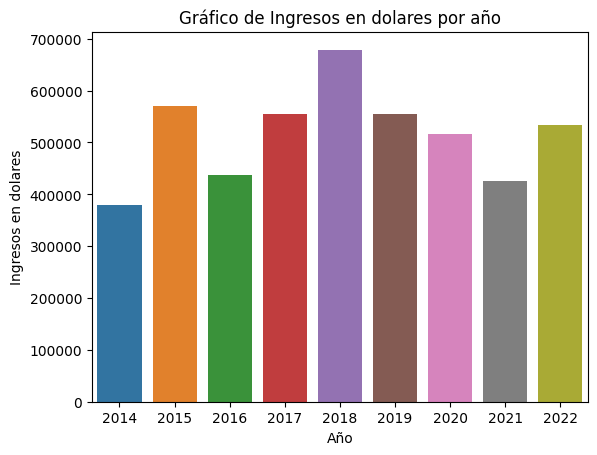

In [62]:
sns.barplot(data=df3, x='Año', y='Ingresos(en dolares)')
plt.xlabel('Año')
plt.ylabel('Ingresos en dolares')
plt.title('Gráfico de Ingresos en dolares por año')
plt.show()